In [2]:
import pandas as pd
import numpy as np
import sklearn
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [4]:
def writeJson(json_path, data):
    '''Overwrite or add the infomation into original json file.

    PARAM:
    `json_path`: the path of the json file
    `data`: the data you wanna add or write in the form of dictionary
    '''
    if type(data) == dict:
        key_list = list(data.keys())
        try:
            with open(json_path, "r") as jsonFile:
                origin = json.load(jsonFile)
            for i in key_list:
                origin[i] = data[i]
            with open(json_path, 'w') as jsonFile:
                jsonObj = json.dumps(origin)
                jsonFile.write(jsonObj)
        except:
            with open(json_path, 'w') as jsonFile:
                jsonObj = json.dumps(data)
                jsonFile.write(jsonObj)
    elif type(data) == list:
        with open(json_path, 'w') as jsonFile:
            jsonObj = json.dumps(data)
            jsonFile.write(jsonObj)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ac0fd0>,
      dtype=object)

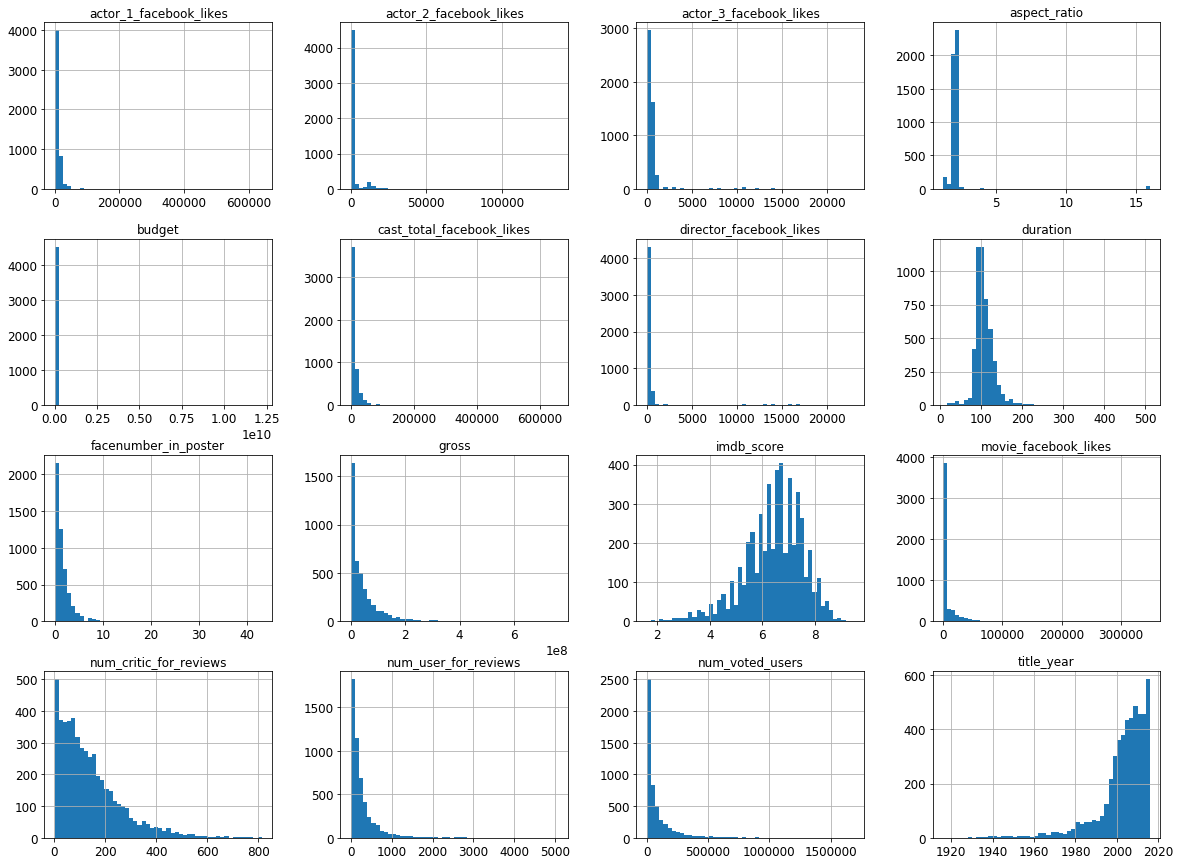

In [5]:
raw_movies = pd.read_csv("dataset/movie_metadata.csv")
raw_movies.columns
raw_movies.hist(bins=50, figsize=(20,15))

In [6]:
raw_movies
len(raw_movies)
raw_movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


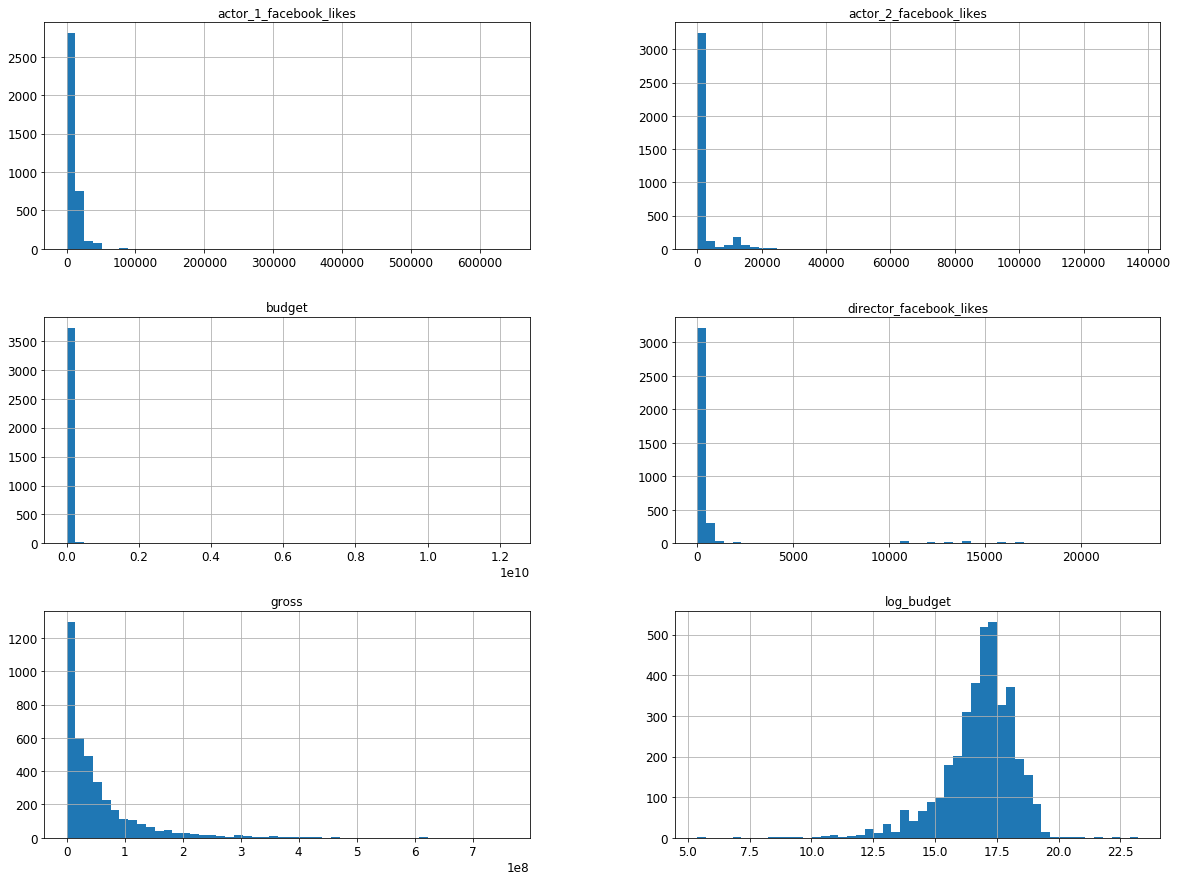

In [7]:
movies = raw_movies.dropna()
movies = movies[["gross", "budget", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes",'country']]
movies.reset_index(drop=True)
# Here we change the gross into the log
# movies["gross"] = np.log(movies["gross"])
movies["log_budget"] = np.log(movies["budget"])
movies.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movies, test_size=0.2, random_state=42)

In [9]:
corr_matrix = movies.corr()

In [10]:
corr_matrix

,gross,budget,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,log_budget
gross,1.000000,0.099496,0.138351,0.144010,0.252842,0.457280
budget,0.099496,1.000000,0.018167,0.016418,0.035715,0.258462
director_facebook_likes,0.138351,0.018167,1.000000,0.089630,0.116058,0.093594
actor_1_facebook_likes,0.144010,0.016418,0.089630,1.000000,0.391166,0.153186
actor_2_facebook_likes,0.252842,0.035715,0.116058,0.391166,1.000000,0.200726
log_budget,0.457280,0.258462,0.093594,0.153186,0.200726,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125951d30>,
      dtype=object)

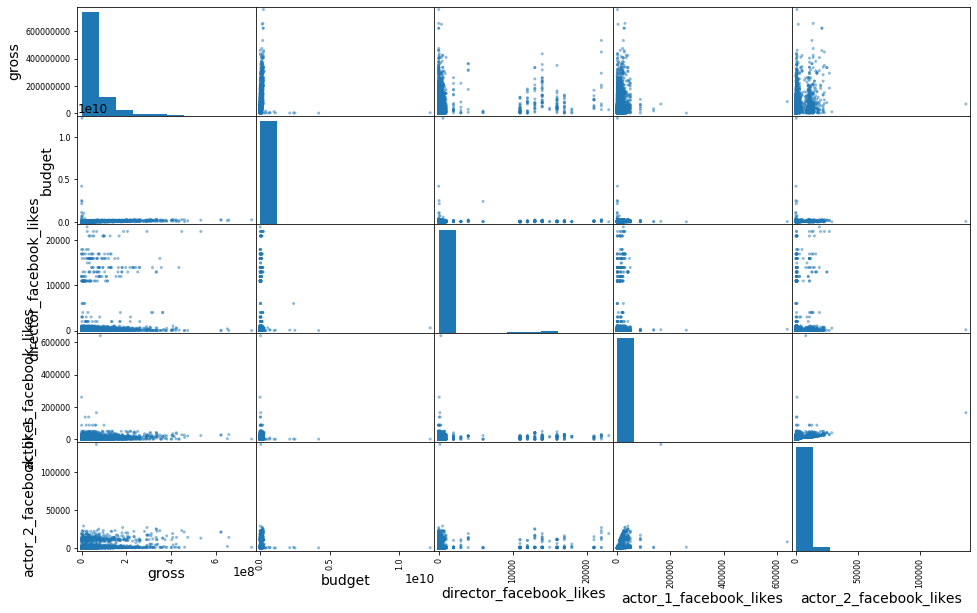

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["gross", "budget", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]
scatter_matrix(movies[attributes], figsize=(16,10))

In [12]:
movies.describe()

,gross,budget,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,log_budget
count,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000
mean,5.261282e+07,4.623685e+07,807.336528,7751.338658,2021.775825,16.801272
std,7.031787e+07,2.260103e+08,3068.171683,15519.339621,4544.908236,1.466742
min,1.620000e+02,2.180000e+02,0.000000,0.000000,0.000000,5.384495
25%,8.270233e+06,1.000000e+07,11.000000,745.000000,384.750000,16.118096
50%,3.009311e+07,2.500000e+07,64.000000,1000.000000,685.500000,17.034386
75%,6.688194e+07,5.000000e+07,235.000000,13000.000000,976.000000,17.727534
max,7.605058e+08,1.221550e+10,23000.000000,640000.000000,137000.000000,23.225971


In [13]:
train_set = train_set.reset_index(drop=True)
train_set["log_gross"] = np.log(train_set["gross"])
train_set.drop(["gross", "budget"], axis=1, inplace=True)
movies_tr_labels = train_set["log_gross"].copy()
movies_tr = train_set.drop("log_gross",axis=1)
movies_tr.head()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,country,log_budget
0,28.0,2000.0,886.0,USA,17.622173
1,0.0,654.0,529.0,Canada,16.523561
2,234.0,12000.0,1000.0,USA,15.201805
3,0.0,957.0,163.0,USA,16.523561
4,0.0,16000.0,5000.0,New Zealand,18.348110


## Pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["country"]
num_attribs = list(movies_tr.drop(cat_attribs, axis=1))

print("num\n", num_attribs)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


movies_tr_preprocessing = full_pipeline.fit_transform(train_set) # Using the full data rather than train data
movies_tr_prepared = movies_tr_preprocessing

num
 ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'log_budget']


In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(movies_tr_prepared, movies_tr_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.4)
elastic_net.fit(movies_tr_prepared, movies_tr_labels)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(movies_tr_prepared, movies_tr_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(movies_tr_prepared, movies_tr_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
def show_some_predictions(model):
    some_data = movies_tr.iloc[-5:]
    some_labels = movies_tr_labels.iloc[-5:]
    some_data_prepared = full_pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))

In [20]:
from sklearn.model_selection import cross_val_score

def display_scores(model):
    scores = cross_val_score(model, movies_tr_prepared, movies_tr_labels, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    result_info = '''
    Scores: {scores}
    Mean: {mean}
    Standard deviation: {std}
    **********************************************
    '''.format(scores=rmse_scores, mean=rmse_scores.mean(), std=rmse_scores.std())
    print(result_info)
    return result_info

In [21]:
import json
def dump_results(**kargs):
    dit = {}
    for k,i in kargs.items():
        dit[k] = display_scores(i)
    writeJson("model_rmse_scores.json", dit)

dump_results(LinearRegression=lin_reg, ElasticNet=elastic_net, DecisionTree=tree_reg, RandomForest=forest_reg)


    Scores: [1.67848872 1.44426014 1.62051307 1.78879164 1.69695815]
    Mean: 1.6458023436700266
    Standard deviation: 0.11435913755766061
    **********************************************
    

    Scores: [1.72223089 1.42885668 1.62488438 1.7683097  1.76791966]
    Mean: 1.6624402636130575
    Standard deviation: 0.12796944596793344
    **********************************************
    

    Scores: [2.46288774 2.01178546 2.1465442  2.16992233 2.25655389]
    Mean: 2.2095387235093114
    Standard deviation: 0.14902366777351536
    **********************************************
    

    Scores: [1.73043394 1.59916459 1.71825934 1.77473184 1.77912003]
    Mean: 1.720341949814091
    Standard deviation: 0.06512029216449215
    **********************************************
    


In [22]:
import datetime
timeStart = datetime.datetime.now()
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint           
param_distribs = [{
        'n_estimators': [5*(i+1) for i in range(20)],
        'max_features': [2*(i+1) for i in range(5)],
        'min_samples_leaf': [1,2,3,4],
        'oob_score':[True]}
]
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = GridSearchCV(forest_reg, param_grid=param_distribs,
                          cv=5, scoring='neg_mean_squared_error', n_jobs=3)
rnd_search.fit(movies_tr_prepared, movies_tr_labels)
timeEnd = datetime.datetime.now()
print(str(timeEnd-timeStart)) 

0:04:54.019893


In [23]:
np.sqrt(-rnd_search.best_score_)

1.5939232612911882

In [24]:
best_rnd_forest_model = rnd_search.best_estimator_ 

In [25]:
from sklearn.externals import joblib
joblib.dump(best_rnd_forest_model, "./model_instance/log_gross.pkl")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./model_instance/log_gross.pkl']

In [25]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
feature_importances = rnd_search.best_estimator_.feature_importances_
importances_vs_features=sorted(zip(feature_importances, attributes), reverse=True, key=lambda x:x[0])

In [26]:
importances_vs_features

[(0.5133981549604322, 'log_budget'),
 (0.1473953447132626, 'actor_2_facebook_likes'),
 (0.13709050169220904, 'actor_1_facebook_likes'),
 (0.11780357896821292, 'director_facebook_likes'),
 (0.04686582621980841, 'USA'),
 (0.010934170267128224, 'UK'),
 (0.00730755908496603, 'France'),
 (0.006599066971671968, 'China'),
 (0.0037318260492862033, 'Spain'),
 (0.0028112872885446526, 'Canada'),
 (0.002651740263819042, 'Germany'),
 (0.0012743864565668871, 'Japan'),
 (0.0009851617363028748, 'Norway'),
 (0.0005861886187827035, 'Australia'),
 (0.0003537594331633982, 'Hong Kong'),
 (0.000101876157289934, 'Iran'),
 (8.351790111262318e-05, 'Argentina'),
 (2.605321744055787e-05, 'New Zealand'),
 (0.0, 'Afghanistan'),
 (0.0, 'Aruba'),
 (0.0, 'Brazil'),
 (0.0, 'Colombia'),
 (0.0, 'Czech Republic'),
 (0.0, 'Denmark'),
 (0.0, 'Finland'),
 (0.0, 'Iceland'),
 (0.0, 'India'),
 (0.0, 'Ireland'),
 (0.0, 'Italy'),
 (0.0, 'Mexico'),
 (0.0, 'Netherlands'),
 (0.0, 'New Line'),
 (0.0, 'Official site'),
 (0.0, 'Peru')

In [27]:
test_set.head()

,gross,budget,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,country,log_budget
1156,10324441.0,25000000.0,37.0,10000.0,826.0,USA,17.034386
1875,241437427.0,5000000.0,38.0,567.0,312.0,USA,15.424948
2283,143492840.0,7500000.0,655.0,24000.0,3000.0,USA,15.830414
1000,10965209.0,30000000.0,29.0,779.0,240.0,USA,17.216708
347,182204440.0,65000000.0,14000.0,23000.0,826.0,USA,17.989898


In [ ]:
test_set = test_set.reset_index(drop=True)
test_set["log_gross"] = np.log(test_set["gross"])
test_set["log_budget"] = np.log(test_set["budget"])
test_set.drop(["gross", "budget"], axis=1, inplace=True)
movies_te_labels = test_set["log_gross"].copy()
movies_te = test_set.drop("log_gross",axis=1)
movies_te.head()

In [ ]:
movies_te_prepared = full_pipeline.transform(movies_te) # Using the full data rather than train data
movies_te_predictions = best_rnd_forest_model.predict(movies_te_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(np.power(np.e,movies_te_labels), np.power(np.e, movies_te_predictions))

In [ ]:
# np.power(np.e, movies_te_labels) - test_set["gross"]

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# X = movies[['country']]
# enc.fit(X)

In [ ]:
# enc.categories_

In [ ]:
# movies["genres"] = movies["genres"].map(lambda x: x.split('|'))

In [ ]:
# movies.stack()

In [ ]:
# Z = movies['genres']
# enc2 = OneHotEncoder(handle_unknown='ignore')
# Z

In [ ]:
# split_genre("ada|dad")